# Q-Learning :

## The Environment :

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class GridEnvironment:
    def __init__(self):
        self.grid_size = 4
        self.grid = np.zeros((self.grid_size, self.grid_size))
        self.agent_position = [0, 0]  # Starting position of the agent
        self.gold_position = [3, 3]
        self.pits = [[1, 1], [2, 2]]
        self.wumpus_position = [1, 3]
        self.wumpus_alive = True
        self.arrow_available = True

        # Setting up grid
        self.grid[self.gold_position[0], self.gold_position[1]] = 1  # Gold
        for pit in self.pits:
            self.grid[pit[0], pit[1]] = -1  # Pits
        self.grid[self.wumpus_position[0], self.wumpus_position[1]] = -2  # Wumpus

    def reset(self):
        self.agent_position = [0, 0]
        self.wumpus_position = [1, 3]
        self.wumpus_alive = True
        self.arrow_available = True
        return tuple(self.agent_position)

    def step(self, action):
        reward = -1  # Movement penalty
        done = False

        # Move the agent
        if action == 'up':
            self.agent_position[0] = max(0, self.agent_position[0] - 1)
        elif action == 'down':
            self.agent_position[0] = min(self.grid_size - 1, self.agent_position[0] + 1)
        elif action == 'left':
            self.agent_position[1] = max(0, self.agent_position[1] - 1)
        elif action == 'right':
            self.agent_position[1] = min(self.grid_size - 1, self.agent_position[1] + 1)
        elif action == 'shoot_up' and self.arrow_available:
            if self.wumpus_position[0] < self.agent_position[0]:
                reward = 50
                self.wumpus_alive = False
            self.arrow_available = False
        elif action == 'shoot_down' and self.arrow_available:
            if self.wumpus_position[0] > self.agent_position[0]:
                reward = 50
                self.wumpus_alive = False
            self.arrow_available = False
        elif action == 'shoot_left' and self.arrow_available:
            if self.wumpus_position[1] < self.agent_position[1]:
                reward = 50
                self.wumpus_alive = False
            self.arrow_available = False
        elif action == 'shoot_right' and self.arrow_available:
            if self.wumpus_position[1] > self.agent_position[1]:
                reward = 50
                self.wumpus_alive = False
            self.arrow_available = False

        # Check if the agent has found the gold
        if self.agent_position == self.gold_position:
            reward = 100
            done = True
        elif self.agent_position in self.pits:
            reward = -1000
            done = True
        elif self.agent_position == self.wumpus_position and self.wumpus_alive:
            reward = -1000
            done = True


        return tuple(self.agent_position), reward, done


    def get_possible_actions(self):
        return ['up', 'down', 'left', 'right', 'shoot_up', 'shoot_down', 'shoot_left', 'shoot_right']


## Q-Learning :

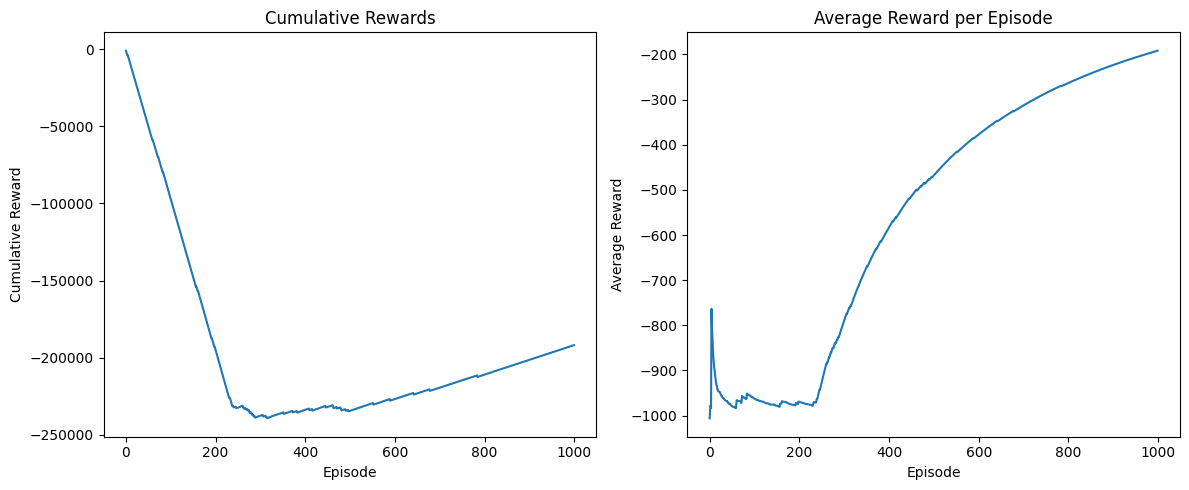

In [3]:

class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay=0.995):
        self.env = env
        self.q_table = {}
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def update_q_value(self, state, action, reward, next_state):
        # Get the best next action based on the current Q-values
        best_next_action = max(self.env.get_possible_actions(), key=lambda a: self.get_q_value(next_state, a))

        # Calculate the target Q-value using the reward and the discounted Q-value of the best next action
        td_target = reward + self.discount_factor * self.get_q_value(next_state, best_next_action)

        # Calculate the temporal difference error
        td_error = td_target - self.get_q_value(state, action)

        # Update the Q-value for the state-action pair using the learning rate
        new_q_value = self.get_q_value(state, action) + self.learning_rate * td_error

       # Store the updated Q-value in the Q-table
        self.q_table[(state, action)] = new_q_value


    def choose_action(self, state):
        if random.uniform(0, 1) < self.exploration_rate:
            return random.choice(self.env.get_possible_actions())
        else:
            return max(self.env.get_possible_actions(), key=lambda a: self.get_q_value(state, a))

    def train(self, episodes):
        rewards_per_episode = []
        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            done = False
            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                total_reward += reward
            rewards_per_episode.append(total_reward)
            self.exploration_rate *= (self.exploration_decay)
        return rewards_per_episode


# Initialize environment and agent
env = GridEnvironment()
agent = QLearningAgent(env)

# Train agent
rewards = agent.train(1000)

# Plot cumulative rewards
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards)
plt.title('Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

# Plot average reward per episode
average_reward_per_episode = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
plt.subplot(1, 2, 2)
plt.plot(average_reward_per_episode)
plt.title('Average Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

plt.tight_layout()
plt.show()


In [21]:
np.cumsum(rewards)

array([  -1006,   -1974,   -2932,   -3934,   -3817,   -4818,   -5779,
         -6823,   -7807,   -8821,   -9830,  -10789,  -11813,  -12853,
        -13873,  -14910,  -15864,  -16945,  -17897,  -18923,  -19877,
        -20830,  -21804,  -22756,  -23788,  -24799,  -25809,  -26765,
        -27807,  -28801,  -29807,  -30763,  -31781,  -32784,  -33792,
        -34793,  -35784,  -36748,  -37752,  -38706,  -39784,  -40785,
        -41843,  -42853,  -43815,  -44776,  -45809,  -46893,  -47924,
        -48915,  -49935,  -50945,  -51959,  -52943,  -53944,  -54896,
        -55977,  -56952,  -58022,  -58979,  -58935,  -59899,  -60860,
        -61921,  -62908,  -63867,  -64821,  -65778,  -66744,  -67738,
        -68993,  -69960,  -69832,  -70829,  -71875,  -72891,  -73854,
        -74929,  -75912,  -76969,  -77949,  -78977,  -79937,  -79889,
        -80944,  -81974,  -82980,  -83950,  -84907,  -85959,  -86964,
        -87923,  -89076,  -90078,  -91089,  -92047,  -93104,  -94120,
        -95134,  -96

In [10]:
import numpy as np

rewardql = np.array(rewards)
list(np.where(rewardql < 0)[0])

[0,
 1,
 2,
 3,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 

In [13]:
rewards[784]

-1002

# DQN :

## The Environment :

In [ ]:
class GridEnvironment:
    def __init__(self):
        self.size = 4
        self.grid = np.zeros((self.size, self.size))
        self.agent_pos = (0, 0)
        self.gold_pos = (3, 3)
        self.wumpus_pos = (1, 3)
        self.pits = [(1, 1), (2, 2)]
        self.arrow_available = True
        self.wumpus_alive = True
        self.reset()

    def reset(self):
        self.agent_pos = (0, 0)
        self.arrow_available = True
        self.wumpus_alive = True
        return self.get_state()

    def step(self, action):
        x, y = self.agent_pos
        reward = -1
        done = False

        if action == 0:  # up
            x = max(0, x - 1)
        elif action == 1:  # down
            x = min(self.size - 1, x + 1)
        elif action == 2:  # left
            y = max(0, y - 1)
        elif action == 3:  # right
            y = min(self.size - 1, y + 1)
        elif action == 4 and self.arrow_available:  # shoot up
            self.arrow_available = False
            if any(self.wumpus_pos == (i, y) for i in range(x)):
                reward = 50
                self.wumpus_alive = False
        elif action == 5 and self.arrow_available:  # shoot down
            self.arrow_available = False
            if any(self.wumpus_pos == (i, y) for i in range(x+1, self.size)):
                reward = 50
                self.wumpus_alive = False
        elif action == 6 and self.arrow_available:  # shoot left
            self.arrow_available = False
            if any(self.wumpus_pos == (x, j) for j in range(y)):
                reward = 50
                self.wumpus_alive = False
        elif action == 7 and self.arrow_available:  # shoot right
            self.arrow_available = False
            if any(self.wumpus_pos == (x, j) for j in range(y+1, self.size)):
                reward = 50
                self.wumpus_alive = False

        self.agent_pos = (x, y)

        if self.agent_pos == self.gold_pos:
            reward = 100
            done = True
        elif self.agent_pos in self.pits:
            reward = -1000
            done = True
        elif self.agent_pos == self.wumpus_pos and self.wumpus_alive:
            reward = -1000
            done = True

        return self.get_state(), reward, done

    def get_state(self):
        state = np.zeros((self.size, self.size, 5))
        state[self.agent_pos][0] = 1
        state[self.gold_pos][1] = 1
        for pit in self.pits:
            state[pit][3] = 1
        state[:,:,4] = int(self.arrow_available)
        return state.flatten()


## DQN Code :

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import Huber
import matplotlib.pyplot as plt

class ReplayMemory:
    def __init__(self, capacity, state_shape):
        self.capacity = capacity
        self.state_shape = state_shape
        self.states = np.zeros((capacity, *state_shape), dtype=np.float32)
        self.actions = np.zeros(capacity, dtype=np.int32)
        self.rewards = np.zeros(capacity, dtype=np.float32)
        self.next_states = np.zeros((capacity, *state_shape), dtype=np.float32)
        self.dones = np.zeros(capacity, dtype=bool)
        self.current_size = 0
        self.index = 0

    def store(self, state, action, reward, next_state, done):
        self.states[self.index] = state
        self.actions[self.index] = action
        self.rewards[self.index] = reward
        self.next_states[self.index] = next_state
        self.dones[self.index] = done
        self.index = (self.index + 1) % self.capacity
        self.current_size = min(self.current_size + 1, self.capacity)

    def sample(self, batch_size):
        indices = np.random.choice(self.current_size, batch_size, replace=False)
        return (self.states[indices], self.actions[indices], self.rewards[indices],
                self.next_states[indices], self.dones[indices])

class DQNAgent:
    def __init__(self, learning_rate, gamma, state_shape, num_actions, batch_size,
                 epsilon_initial=1.0, epsilon_decay=0.995, epsilon_final=0.05,
                 replay_buffer_capacity=1000):
        self.learning_rate = learning_rate
        self.gamma = gamma
        self.num_actions = num_actions
        self.batch_size = batch_size
        self.epsilon = epsilon_initial
        self.epsilon_decay = epsilon_decay
        self.epsilon_final = epsilon_final
        self.buffer = ReplayMemory(replay_buffer_capacity, state_shape)
        self.q_network = self._build_model(state_shape, num_actions)
        self.target_network = self._build_model(state_shape, num_actions)
        self.update_target_network()

    def _build_model(self, state_shape, num_actions):
        model = keras.Sequential([
            keras.layers.Dense(128, activation='relu', input_shape=state_shape),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(num_actions, activation=None)
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=self.learning_rate),
                      loss=Huber())
        return model

    def update_target_network(self):
        self.target_network.set_weights(self.q_network.get_weights())


    def select_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(self.num_actions)
        else:
            q_values = self.q_network.predict(state[np.newaxis])
            action = np.argmax(q_values[0])
        return action

    def train(self, env, episodes):
        cumulative_rewards, rewards_per_episode = [], []
        for episode in range(episodes):
            state = env.reset()
            done, total_reward = False, 0
            while not done:
                action = self.select_action(state)
                next_state, reward, done = env.step(action)
                self.buffer.store(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward

                if self.buffer.current_size >= self.batch_size:
                    self.replay()

            self.update_epsilon()
            self.update_target_network()
            cumulative_rewards.append(total_reward)
            rewards_per_episode.append(total_reward)
            print(f'Episode {episode+1}/{episodes}, Total Reward: {total_reward}, Epsilon: {self.epsilon}')

        return cumulative_rewards, rewards_per_episode

    def replay(self):
        if self.buffer.current_size < self.batch_size:
            return

        states, actions, rewards, next_states, dones = self.buffer.sample(self.batch_size)
        q_values_current = self.q_network.predict(states)
        q_values_next = self.target_network.predict(next_states)

        targets = q_values_current.copy()
        batch_indices = np.arange(self.batch_size, dtype=np.int32)
        targets[batch_indices, actions] = rewards + self.gamma * np.amax(q_values_next, axis=1) * (1 - dones)

        self.q_network.train_on_batch(states, targets)

    def update_epsilon(self):
        self.epsilon = max(self.epsilon_final, self.epsilon * self.epsilon_decay)
    def save_model(self, model_path):
        self.q_network.save(model_path)

    def load_model(self, model_path):
        self.q_network = keras.models.load_model(model_path)
        self.update_target_network()





In [ ]:
# Initialize the environment
env = GridEnvironment()

# Define hyperparameters
learning_rate = 1e-4
gamma = 0.99
state_shape = (env.size * env.size * 5,)
actions = 8  # 4 for moving, 4 for shooting
batch_size = 64

# Create the agent
agent = DQNAgent(learning_rate, gamma, state_shape, actions, batch_size)

# Train the agent
episodes = 1000
cumulative_rewards, rewards_per_episode = agent.train(env, episodes)

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
Episode 808/1000, Total Reward: -1222, Epsilon: 0.05
2/2 [==============================] - 0s 6ms/step
Episode 809/1000, Total Reward: 145, Epsilon: 0.05
2/2 [==============================] - 0s 5ms/step
Episode 810/1000, Total Reward: 145, Epsilon: 0.05
2/2 [==============================] - 0s 10ms/step
Episode 811/1000, Total Reward: 145, Epsilon: 0.05
2/2 [==============================] - 0s 9ms/step
Episode 812/1000, Total Reward: 145, Epsilon: 0.05
2/2 [==============================] - 0s 6ms/step
Episode 813/1000, Total Reward: 145, Epsilon: 0.05
2/2 [==============================] - 0s 5ms/step
Episode 814/1000, Total Reward: 145, Epsilon: 0.05
2/2 [==============================] - 0s 5ms/step
Episode 815/1000, Total Reward: 144, Epsilon: 0.05
2/2 [==============================] - 0s 12ms/step
Episode 816/1000, Total Reward: 94, Epsilon: 0.05
2/2 [=======================

In [ ]:
import numpy as np
rewards_2 = rewards_per_episode

# Assuming rewards_per_episode is your list
np.save('rewards_per_episode_2.npy', rewards_2)

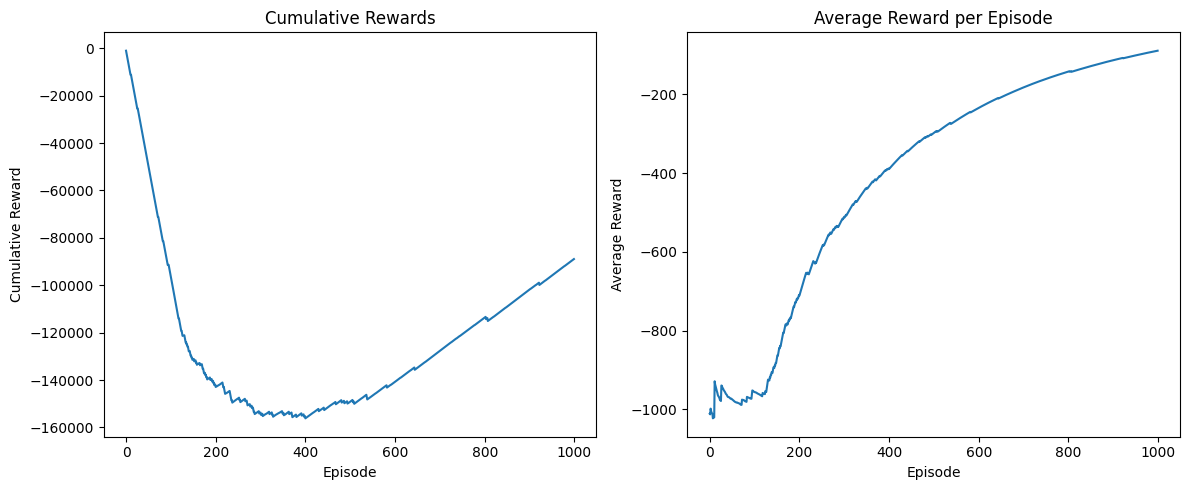

In [ ]:
import numpy as np
rewards_2 = rewards_per_episode
# Plot cumulative rewards
cumulative_rewards = np.cumsum(rewards_2)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cumulative_rewards)
plt.title('Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')

# Plot average reward per episode
average_reward_per_episode = np.cumsum(rewards_2) / np.arange(1, len(rewards_2) + 1)
plt.subplot(1, 2, 2)
plt.plot(average_reward_per_episode)
plt.title('Average Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

plt.tight_layout()
plt.show()

In [14]:
!gdown 1aocwEZonElxcXns8hElw9s6rKdaPvwlw

Downloading...
From: https://drive.google.com/uc?id=1aocwEZonElxcXns8hElw9s6rKdaPvwlw
To: /content/rewards_per_episode_2.npy
100% 8.13k/8.13k [00:00<00:00, 12.5MB/s]


In [15]:
rewards2 = np.load('rewards_per_episode_2.npy')

In [16]:
rewards2

array([-1011, -1014,  -969, -1021, -1025, -1019, -1019, -1103, -1001,
       -1003, -1039,    82, -1029, -1002, -1010, -1025, -1012, -1020,
       -1062, -1013, -1003, -1008, -1053, -1054, -1003, -1007,    84,
        -960, -1050, -1001, -1009, -1038, -1006, -1016, -1010, -1039,
       -1050, -1009, -1009, -1068, -1043, -1011,  -956, -1002, -1020,
       -1016, -1024, -1008,  -951, -1012, -1043, -1006, -1039, -1017,
       -1055, -1015, -1047, -1014, -1004, -1021, -1022,  -958, -1010,
       -1033, -1002, -1014, -1036, -1012, -1004, -1145, -1001, -1004,
         -18, -1009, -1011,  -955, -1007, -1085, -1030, -1061, -1005,
       -1020, -1035,    79, -1009, -1005, -1024, -1010, -1018, -1020,
       -1042, -1020,  -954, -1021,    37,    40, -1001, -1107, -1026,
       -1010, -1023, -1020,  -951, -1005, -1035, -1007, -1076, -1016,
       -1014, -1020, -1024, -1036, -1030, -1089, -1027, -1067, -1037,
       -1057,    25, -1048, -1023, -1044, -1001, -1044,   -10, -1134,
       -1044,    65,

In [20]:
np.cumsum(rewards2)

array([  -1011,   -2025,   -2994,   -4015,   -5040,   -6059,   -7078,
         -8181,   -9182,  -10185,  -11224,  -11142,  -12171,  -13173,
        -14183,  -15208,  -16220,  -17240,  -18302,  -19315,  -20318,
        -21326,  -22379,  -23433,  -24436,  -25443,  -25359,  -26319,
        -27369,  -28370,  -29379,  -30417,  -31423,  -32439,  -33449,
        -34488,  -35538,  -36547,  -37556,  -38624,  -39667,  -40678,
        -41634,  -42636,  -43656,  -44672,  -45696,  -46704,  -47655,
        -48667,  -49710,  -50716,  -51755,  -52772,  -53827,  -54842,
        -55889,  -56903,  -57907,  -58928,  -59950,  -60908,  -61918,
        -62951,  -63953,  -64967,  -66003,  -67015,  -68019,  -69164,
        -70165,  -71169,  -71187,  -72196,  -73207,  -74162,  -75169,
        -76254,  -77284,  -78345,  -79350,  -80370,  -81405,  -81326,
        -82335,  -83340,  -84364,  -85374,  -86392,  -87412,  -88454,
        -89474,  -90428,  -91449,  -91412,  -91372,  -92373,  -93480,
        -94506,  -95